In [1]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
CRIME_CSV_PATH = "./db/aichi-crime-2020.csv"
crime_df = pd.read_csv(CRIME_CSV_PATH)
display(crime_df.head())

,id,crime,trick,police_station,police_box,city_code,prefecture,city,number,date,time,place,place_name,lat,lon,relevance
0,crime-00001,窃盗,部品ねらい,西,名塚,231045,愛知県,名古屋市西区,天塚町４丁目,2019-09-11,20,その他の住宅（３階建て以下共同住宅等）,"日本, 愛知県名古屋市西区天塚町4丁目",35.200157,136.892705,0.99
1,crime-00002,窃盗,部品ねらい,西,名塚,231045,愛知県,名古屋市西区,上堀越町２丁目,2019-08-05,18,駐車（輪）場,"日本, 愛知県名古屋市西区上堀越町2丁目",35.204867,136.881139,0.99
2,crime-00003,窃盗,部品ねらい,西,名塚,231045,愛知県,名古屋市西区,上堀越町３丁目,2019-05-23,08,駐車（輪）場,"日本, 愛知県名古屋市西区上堀越町3丁目",35.204543,136.879850,0.99
3,crime-00004,窃盗,部品ねらい,西,名塚,231045,愛知県,名古屋市西区,香呑町１丁目,2019-03-10,17,駐車（輪）場,"日本, 愛知県名古屋市西区香呑町1丁目",35.203126,136.899371,0.99
4,crime-00005,窃盗,部品ねらい,西,名塚,231045,愛知県,名古屋市西区,香呑町１丁目,2019-03-11,19,駐車（輪）場,"日本, 愛知県名古屋市西区香呑町1丁目",35.203126,136.899371,0.99


In [3]:
# GeoJSONに変換
record_list = []

for index,row in crime_df.iterrows():
    
    id = row[0]

    crime = row[1]
    trick = row[2]
    police_station = row[3]
    police_box = row[4]
    city_code = row[5]
    prefecture = row[6]
    city = row[7]
    number = row[8]
    date = row[9]
    time = row[10]
    place = row[11]
    place_name = row[12]
    lat = row[13]
    lon = row[14]
    relevance = row[15]
    
    record = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [lon, lat],
        },
        "properties": {
            "id": id,
            "crime": crime,
            "trick": trick,
            "police_station": police_station,
            "police_box": police_box,
            "city_code": city_code,
            "prefecture": prefecture,
            "city": city,
            "number": number,
            "date": date,
            "time": time,
            "place": place,
            "place_name": place_name,
            "relevance": relevance
        }
    }
    
    record_list.append(record)

In [4]:
# レコード数
print(len(record_list))

45456


In [5]:
# 最初のレコード
print(record_list[0]["geometry"]["coordinates"])

[136.892705485502, 35.2001569561191]


In [6]:
# GeoJSONに変換
geojson = {
    "type": "FeatureCollection",
    "features": []
}

geojson["features"] = record_list

# GeoJSONファイルを書込
with open("./geojson/aichi-crime-2020.geojson", "w") as f:
    json.dump(geojson, f, ensure_ascii=False)

In [35]:
crime_gdf = gpd.read_file("./geojson/aichi-crime-2020.geojson")
print(len(crime_gdf))

45456


In [36]:
crime_gdf[0:1]

,id,crime,trick,police_station,police_box,city_code,prefecture,city,number,date,time,place,place_name,relevance,geometry
0,crime-00001,窃盗,部品ねらい,西,名塚,231045,愛知県,名古屋市西区,天塚町４丁目,2019-09-11,20,その他の住宅（３階建て以下共同住宅等）,"日本, 愛知県名古屋市西区天塚町4丁目",0.99,POINT (136.89271 35.20016)


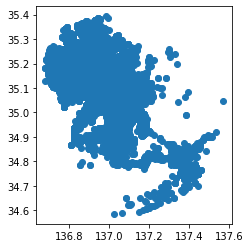

In [37]:
crime_gdf[crime_gdf["relevance"] > 0.8].plot()

In [38]:
# 直交座標系に変換
crime_gdf = crime_gdf.to_crs(6675)

In [39]:
crime_gdf[0:1]

,id,crime,trick,police_station,police_box,city_code,prefecture,city,number,date,time,place,place_name,relevance,geometry
0,crime-00001,窃盗,部品ねらい,西,名塚,231045,愛知県,名古屋市西区,天塚町４丁目,2019-09-11,20,その他の住宅（３階建て以下共同住宅等）,"日本, 愛知県名古屋市西区天塚町4丁目",0.99,POINT (-24945.899 -88700.621)


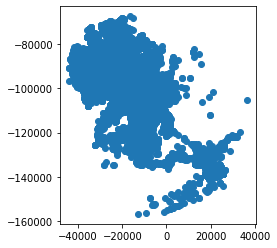

In [40]:
crime_gdf[crime_gdf["relevance"] > 0.8].plot()

In [46]:
n_sample = 100
sample_gdf = crime_gdf[crime_gdf["relevance"]>0.8].sample(n_sample)
display(sample_gdf)

,id,crime,trick,police_station,police_box,city_code,prefecture,city,number,date,time,place,place_name,relevance,geometry
12433,crime-12434,窃盗,自転車盗,愛知,沓掛,232297,愛知県,豊明市,沓掛町田楽ケ窪,2019/7/10,9,駐車（輪）場,"日本, 愛知県豊明市沓掛町田楽ケ窪",0.990000,POINT (-14882.927 -103252.656)
10666,crime-10667,窃盗,自転車盗,中村,名古屋駅西,231053,愛知県,名古屋市中村区,椿町,2018/12/24,12,道路上,"日本, 愛知県名古屋市中村区椿町17番",0.990000,POINT (-25956.761 -92297.030)
26241,crime-26242,窃盗,自転車盗,半田,武豊,234478,愛知県,武豊町,字道崎,2020/2/28,13,駐車（輪）場,"日本, 愛知県知多郡武豊町道崎",0.801728,POINT (-22912.845 -127507.581)
5592,crime-05593,窃盗,自動車盗,豊田,加納,232114,愛知県,豊田市,乙部ケ丘１丁目,2019/2/14,17,一戸建住宅,"日本, 愛知県豊田市乙部ケ丘1丁目",0.990000,POINT (-2237.302 -94296.843)
27581,crime-27582,窃盗,部品ねらい,西,比良,231045,愛知県,名古屋市西区,比良２丁目,2018-06-03,18,その他,"日本, 愛知県名古屋市西区比良2丁目",0.990000,POINT (-24252.281 -85698.439)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16107,crime-16108,窃盗,部品ねらい,熱田,日比野,231096,愛知県,名古屋市熱田区,幡野町,2020-08-19,01,駐車（輪）場,"日本, 愛知県名古屋市熱田区幡野町16番",0.990000,POINT (-25335.674 -95612.460)
3701,crime-03702,窃盗,車上ねらい,稲沢,国府宮,232203,愛知県,稲沢市,高御堂１丁目,2019/8/5,10,その他の住宅（３階建て以下共同住宅等）,"日本, 愛知県稲沢市高御堂1丁目10番",0.990000,POINT (-33137.999 -82949.775)
28242,crime-28243,窃盗,部品ねらい,名東,蓬来,231151,愛知県,名古屋市名東区,上菅１丁目,2018-06-26,22,４階建て以上共同住宅,"日本, 愛知県名古屋市名東区上菅1丁目",0.990000,POINT (-15548.052 -91243.427)
12535,crime-12536,窃盗,自転車盗,春日井,春日井駅前,232068,愛知県,春日井市,瑞穂通６丁目,2019/9/26,17,道路上,"日本, 愛知県春日井市瑞穂通6丁目",0.990000,POINT (-17610.715 -83135.843)
